# Summarising Monthly Weather Data Using MapReduce

Date: 19.12.2021 <br>
by: Mohamed Gutale

## 1. Introduction

This is a big data project to stistically summarise the hourly weather data from National Climate Centre in United States -NCDC- for the month of April 2007 using distributed MapReduce framework and hadoop file systems - HDFS.  

## 2. Problem Definition and Framework

### 2.1 Task Definition

Big data is huge phenomena in todays world. Most of the large companies are faced with tackling this challenge heads on. The task of this project to is analyse and extract useful statistical information from the monthly weather data from NCDC. These types of data are too large to be analysed on a typical computer and would require a cluster of computers to handle. <br> The task is to extract the minimum, maximimum Dry Bulb Temperatures for each day of the month of April 2007 as well as the mean and median and variance of these temperatures. although this would seem very easy to handle in a small dataset, large datasets would require dedicated software and hardware solutions to solve these tasks. <br> I am therefore using HDFS and MapReduce framework to analyse this data and extract these information.  Successful project means that i will be able to visually present the data in a tabulated format.    

### 2.2 MapReduce Framework

MapReduce framework is a type of computing that has been implemented by several systems including Google's internal implementation called MapReduce and the popular open source implementation Hadoop which is available from the Apache Foundation. MapReduce enables the user to manage many large scale, parallel computations in a way that is torelant of hardware issues and faults. <br> All that the user needs to do is write the functions Mapper and Reducer - shown in the attached file for this project - and the system manages the parallel execution and coordination of tasks that execute the Map or Reduce. <br> MapReduce frame work executes the following steps:
1. Certain number of tasks are given to one or more chunks from a distributed file systems. These Map tasks turn the chunk into a sequence of key-value pairs. The key-value pairs are produced from the input data which is determinted by the code given by the user for each Map function which is almost always stored in the HDFS.  
2. The key-value pairs from each Map task is then collected by master controller and sorted by key. The keys are then divided among all the reduce tasks so that key value, so that all the key-value pairs with the same key wind up at the same Reduce task. 
3. The Reduce task works on one key at a time and combines all the values associated with that key in some way. The number of combinations of values is determined by the code written by the user for the Reduce task.  

## 3. Experimental Evaluation

### 3.1 Methodology

Due to the size of file, i will be using the university of London's HDFS and Apache MapReduce framework.  These will be the steps to the project:
1. Scurely copy the file from the local systems to HDFS
2. Write the Map function which takes an input file from the HDFS and produces key-value pairs
3. Write the Reduce function which takes its input from the result of the Map function and combines the values by key and compute the above statistics
4. The Map and Reduce python code files will be securely copied over to HDFS local file systems
5. The execution of the MapReduce framework will be written into a bash file attached and executed
6. The result produced as txt file is then copied back out to my local file system
7. All the statistics used in this function wil be written and no packages will be imported.  

Although there are five descriptive statistics to compute, the result of the project will be compeleted in one Map and Reduce task thus producing one txt file containing the following columns:
- YearMonthDay
- Min Dry Bulb Temp
- Max Dry Bulb Temp
- Mean Dry Bulb Temp
- Median Dry Bulb Temp 
- Variance Dry Bulb Temp	

This result file will then be loaded to this notebook and result is then visualised using Pandas and Matplotlib. finally this project will be using the commandline to complete the tasks.  

### 3.2 Dataset

As mentioned in the outline, the data is the historical hourly weather station data for the month of April in 2007 collected by the [NCDC](https://www.ncdc.noaa.gov/cdo-web/ "NCDC"). The size of the file is 173.6 MB and contains range of data points from collected throughout the month. These data points include the YearMonthDay, Time, Station, Sky Condition, Visibility, Weather Type, Dry Bulb Temperature and many more.

### 3.3 Implementation of MapReduce Codes

**Mapper function**

```
for index, line in enumerate(sys.stdin):
    # Skip the first column containing the column labels
    if index == 0:
        continue
    else:
        line = line.strip().split(',')
        print("%s \t %s" % (line[1], line[8]))
```
 
This code will produce two columns from the iinput data. Column 2 which contains the day indentifier "YearMonthDay" and column 9 which contains the numerical data containing the "Dry bulb Temp". 

**Reducer Function**

```
# Declare an empty dictionary 
data = defaultdict(list)

# Loop through the dictionary and print the max, min and variance for each day

for values in sys.stdin:
    day, temp = values.strip(' ').split('\t')
    if '-\n' not in temp:
        data[day].append(int(temp))

# calculate the statistics
print('YearMonthDay', ',', 'Min Dry Bulb Temp', ',', 'Max Dry Bulb Temp', ',', 'Mean Dry Bulb Temp', ',',
      'Median Dry Bulb Temp', ',', 'Variance Dry Bulb Temp')
      
for key, value in data.items():
    print('{},{},{},{:.2f},{:.2f},{:.2f}'.format(key, min(value), max(value), mean(value), median(value),
                                                 variance(value)))
```

This Reduce code will initially declare an empty dictionary to loop though the output of the Map function with keys are YearMonthDay and all the values of the Dry Bulb temperature for that day as its values in list. After all the values are aggregated into a list with correct keys, the the descriptive statistics are then computed and printed which each given a column header as shown above.  

The required functions of mean, median and variance are defined within the Reduce function and called.  

**Execution of MapReduce Task**

The Map and Reduce functions are loaded to the local file systems of the hadoop platform and bash file shown below containing the execution code of MapReduce functions and input data already loaded to HDFS using hadoop streaming jar is created.  

```
hadoop jar /opt/hadoop/current/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar \
    -file mapper.py-mapper mapper.py \
    -file reducer.py -reducer reducer.py \
    -input 200704hourly.txt -output output
```
This file will output the output file containing the result of the MapReduce tasks. 

### 3.4 Results

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
current_path = os.getcwd()
values = []

#loop through the output file from the MapReduce and convert to pandas df
for i in os.listdir(current_path):
    if 'output' in i:
        with open(os.path.join(current_path, i), 'r') as file:
            for index, value in enumerate(file.readlines()):
                if index == 0:
                    col_header = value.replace('\t\n', '').replace(' ','').split(',')
                else:
                    row = value.replace('\t\n','').split(',')
                    values.append(row)
#output file
output = pd.DataFrame(values, columns = col_header)

In [78]:
#print output info
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearMonthDay         30 non-null     object 
 1   MinDryBulbTemp       30 non-null     int64  
 2   MaxDryBulbTemp       30 non-null     int64  
 3   MeanDryBulbTemp      30 non-null     float64
 4   MedianDryBulbTemp    30 non-null     float64
 5   VarianceDryBulbTemp  30 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.5+ KB


In [75]:
#clean up the data types to the correct format type
for col in output.columns:
    if 'Min' in col or 'Max' in col:
        output[col] = output[col].astype('int')
    elif 'Mean' in col or 'Median' in col or 'Variance' in col:
        output[col] = output[col].astype('float')

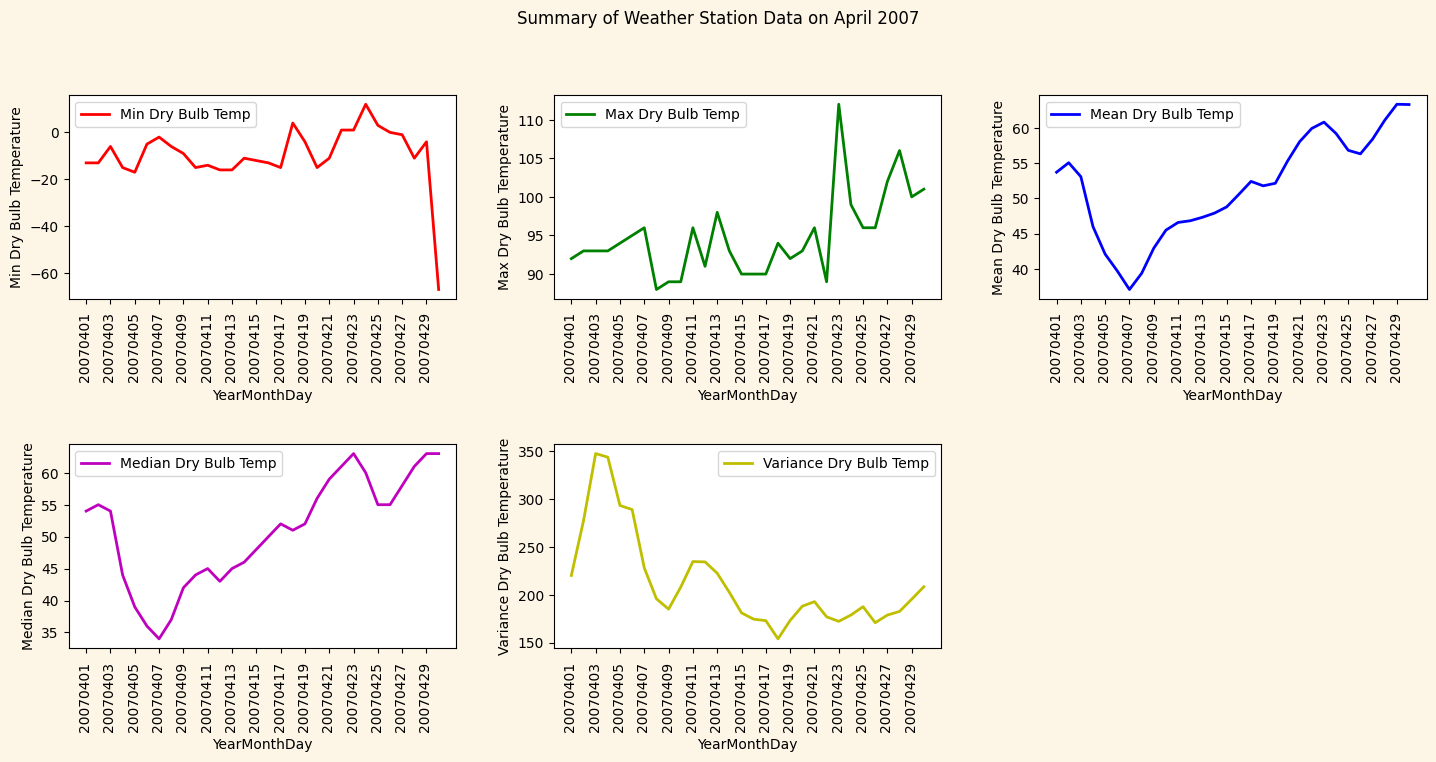

In [179]:
#visualise the data

fig, axs = plt.subplots(2,3, figsize = (15,8), dpi = 100, facecolor = 'oldlace', edgecolor = 'white')
axs[1][2].set_visible(False)

axs[0,0].plot(output.YearMonthDay, output.MinDryBulbTemp, linewidth=2, markersize = 12, label = 'Min Dry Bulb Temp', c = 'r')
axs[0,0].set_ylabel('Min Dry Bulb Temperature')
axs[0,0].set_xlabel('YearMonthDay')
axs[0,0].set_xticks(output.YearMonthDay.values.tolist()[::2])
axs[0,0].set_xticklabels(output.YearMonthDay.values.tolist()[::2],rotation = 90)
axs[0,0].legend()


axs[0,1].plot(output.YearMonthDay, output.MaxDryBulbTemp, linewidth=2, markersize = 12, label = 'Max Dry Bulb Temp', c = 'g')
axs[0,1].set_ylabel('Max Dry Bulb Temperature')
axs[0,1].set_xlabel('YearMonthDay')
axs[0,1].set_xticks(output.YearMonthDay.values.tolist()[::2])
axs[0,1].set_xticklabels(output.YearMonthDay.values.tolist()[::2],rotation = 90)
axs[0,1].legend()


axs[0,2].plot(output.YearMonthDay, output.MeanDryBulbTemp, linewidth=2, markersize = 12, label = 'Mean Dry Bulb Temp', c = 'b')
axs[0,2].set_ylabel('Mean Dry Bulb Temperature')
axs[0,2].set_xlabel('YearMonthDay')
axs[0,2].set_xticks(output.YearMonthDay.values.tolist()[::2])
axs[0,2].set_xticklabels(output.YearMonthDay.values.tolist()[::2],rotation = 90)
axs[0,2].legend()


axs[1,0].plot(output.YearMonthDay, output.MedianDryBulbTemp, linewidth=2, markersize = 12, label = 'Median Dry Bulb Temp', c = 'm')
axs[1,0].set_ylabel('Median Dry Bulb Temperature')
axs[1,0].set_xlabel('YearMonthDay')
axs[1,0].set_xticks(output.YearMonthDay.values.tolist()[::2])
axs[1,0].set_xticklabels(output.YearMonthDay.values.tolist()[::2],rotation = 90)
axs[1,0].legend()


axs[1,1].plot(output.YearMonthDay, output.VarianceDryBulbTemp, linewidth=2, markersize = 12, label = 'Variance Dry Bulb Temp', c = 'y')
axs[1,1].set_ylabel('Variance Dry Bulb Temperature')
axs[1,1].set_xlabel('YearMonthDay')
axs[1,1].set_xticks(output.YearMonthDay.values.tolist()[::2])
axs[1,1].set_xticklabels(output.YearMonthDay.values.tolist()[::2],rotation = 90)
axs[1,1].legend()
fig.suptitle('Summary of Weather Station Data on April 2007')
fig.tight_layout(pad=3.0)
plt.savefig('summary.png')
plt.show()


### 3.5 List of Project files

In [5]:
 for file in os.listdir(current_path):
        if 'checkpoints' in file:
            continue
        elif 'Store' in file:
            continue
        else:
            print(file)

mapper.py
datasets
output
reducer.py
summary.png
Weather_Station_Project.ipynb
mapreduce_implementation_code


## 4. Conclusion

in conclusion, the MapReduce framework worked like wonders and produced the above output table. The process of running the hadoop streaming jar file was fairly quick for such as a large file and most of the time of this project was spent on writing the python Mapper and Reducer codes and loading data into the HDFS file.  